# 1. Introduction

Gilang Wiradhyaksa

Objektif dari projek ini adalah untuk menganalisa data superstore, dengan tujuan untuk meningkatkan profit perusahaan. Mencari faktor apa saja yang mempengaruhi profit perusahaan dan apa yang perlu dilakukan untuk meningkatkan profit perusahaan.

Sumber Data :
[Data Source](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

Dashboard :
[Dashboard](https://public.tableau.com/app/profile/gilang.wiradhyaksa/viz/Milestone_1_16952848245730/Milestone_1)

# 2. Problem Identification

## 2.1 SMART

- **Specific** : Meningkatkan profit dari penjualan superstore
- **Measurable** : Meningkatkan profit penjualan sebesar 10%
- **Achievable** : Dengan berbagai produk yang dimiliki oleh superstore, meningkatkan profit sebesar 10% adalah hal yang dapat dicapai
- **Relevant** : Meningkatkan profit perusahaan akan berdampak baik untuk pertumbuhan perusahaan kedepannya
- **Time-Bound** : Tujuannya adalah untuk meningkatkan profit perusahaan sebesar 10% dalam waktu satu tahun kedepan

## 2.2 Problem Statement

Tujuannya adalah untuk meningkatkan profit perusahaan sebesar 10% dalam waktu satu tahun kedepan.

## 2.3 Define a Problem (5W + 1H)

- Dinegara bagian mana perusahaan mendapatkan profit tertinggi ?
- Segmen pelanggan mana yang memberikan profit tertinggi untuk perusahaan ?
- Kategori produk mana yang memberikan profit tertinggi untuk perusahaan ?
- Apakah terdapat Sub-Kategori produk yang mengurangi profit perusahaan ?
- Kategori produk mana yang paling laku terjual ?
- Bagaimana profit perusahaan dalam 4 tahun terakhir di setiap region ?
- Apakah jumlah customer memiliki hubungan dengan profit yang didapat pada setiap negara bagian ? (Statistic descriptive - Correlation)
- Apakah jumlah diskon yang diberikan mempengaruhi profit perusahaan ? (Statistic inferential - Chi Square)

## 2.4 Metrics Used

Metrics yang digunakan untuk problem statement ini adalah GMV, rumus dari GMV adalah harga barang yang terjual dikalikan dengan jumlah barang yang terjual. Untuk meningkatkan profit, GMV dapat digunakan jika kita memfokuskan penggunaan metrics pada produk yang memiliki profit yang tinggi. Sehingga jika produk yang memiliki profit tinggi ini di tingkatkan penjualannya maka otomatis profit akan meningkat.

# 3. Data Loading

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
pd.set_option("display.precision", 2)

[Data Source](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

In [2]:
#Get Data from CSV
df = pd.read_csv('superstore_data.csv', index_col = 'Row ID', encoding='cp1252')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00,9994.00
mean,55190.38,229.86,3.79,0.16,28.66
std,32063.69,623.25,2.23,0.21,234.26
min,1040.00,0.44,1.00,0.00,-6599.98
25%,23223.00,17.28,2.00,0.00,1.73
50%,56430.50,54.49,3.00,0.20,8.67
75%,90008.00,209.94,5.00,0.20,29.36
max,99301.00,22638.48,14.00,0.80,8399.98


In [5]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Data yang didapatkan memiliki 21 kolom dan 9994 baris. Data sudah bagus, tidak terdapat value dengan nilai null pada seluruh kolom. Juga terdapat 3 kolom dengan tipe data float, 2 kolom dengan tipe data int dan 15 kolom dengan tipe data object.

# 4. Data Cleaning

## 4.1 Data Duplicate

In [6]:
#Find duplicate data
df.loc[df.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3407,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.37,2,0.3,-12.06


In [7]:
#Delete diplicate data
df = df.drop_duplicates()

Ditemukan sebuah data yang merupakan duplikasi, maka baris data duplikat tersebut dihapus.

In [8]:
#Check unique value for each column
df.nunique()

Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [9]:
df['Country'].unique()

array(['United States'], dtype=object)

Data diatas menampilkan jumlah unique value pada setiap kolom. Dari informasi ini terdapat dua kolom yang dapat dihilangkan karena tidak diperlukuan. Kolom pertama adalah Country, hanya terdapat satu data pada kolom country yaitu "United States" sehingga dapat disimpulkan bahwa seluruh data ini terjadi di United States dan kolom tersebut dapat dihilangkan. Selanjutnya kolom Customer ID dan Customer Name memiliki jumlah yang sama persis sebanyak 793 yang artinya seluruh customer memiliki ID nya masing - masing, maka kolom customer name tidak dibutuhkan dan dapat dihilangkan.

In [10]:
#Delete useless columns
df = df.drop(columns=['Country', 'Customer Name'])

## 4.2 Inconsistent Data Handling

In [11]:
df[['Order Date', 'Ship Date']].head(3)

,Order Date,Ship Date
Row ID,,
1,11/8/2016,11/11/2016
2,11/8/2016,11/11/2016
3,6/12/2016,6/16/2016


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

Kolom order date dan ship date bertipe data object, maka perlu dilakukan perubahan tipe data menjadi date time agar datanya bisa diolah dan dianalisa lebih lanjut.

# 5. Exploratory Data Analysis

## 5.1 Dinegara bagian mana perusahaan mendapatkan profit tertinggi ?

In [13]:
#Sum profit per State

# df_per_state = df.groupby('State').agg({'Customer ID':'count'}).sort_values(by=['Customer ID'], ascending=False)
df_per_state = df.groupby('State').agg({'Profit':'sum'}).sort_values(by=['Profit'], ascending=False).reset_index()
df_per_state.head()

,State,Profit
0,California,76381.39
1,New York,74038.55
2,Washington,33402.65
3,Michigan,24463.19
4,Virginia,18597.95


In [14]:
df_per_state.tail()

,State,Profit
44,North Carolina,-7490.91
45,Illinois,-12607.89
46,Pennsylvania,-15559.96
47,Ohio,-16959.32
48,Texas,-25729.36


In [15]:
#Set abbreviation for each State
state_to_abb = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [16]:
# df_per_state['state_abb'] = df_per_state['State'].replace(state_to_abb)
df_per_state['State'] = df_per_state['State'].replace(state_to_abb)
df_per_state.set_index('State', inplace=True)
df_per_state.index.name = None

In [39]:
#Create choropleth graph

fig = go.Figure(data=go.Choropleth(
    # locations= df_for_map['state_abb'].value_counts().index,
    # z = df_for_map['state_abb'].value_counts(),
    locations = df_per_state['Profit'].index,
    z = df_per_state['Profit'],
    locationmode = 'USA-states',
    # colorscale = [[0, 'rgb(237, 62, 62)'], [1, 'rgb(0, 207, 133)']],
    colorscale = ["rgb(255, 77, 77)", "rgb(210, 231, 154)", "rgb(94, 179, 39)", "rgb(67, 136, 33)"], #"rgb(33, 74, 12)"
    # color_continuous_midpoint = 0,
    zmin=-30000, zmid=0, zmax=60000
))

fig.update_layout(
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit per State",
        'y':0.95,
        'x':0.5
        },
    geo_scope='usa',
)

fig.show()

Berdasarkan graphic map diatas, dapat terlihat bahwa state atau negara bagian yang menghasilkan profit terbesar adalah California, New York dan Wasingthon. Sedangkan untuk negara bagian yang penjualannya merugi adalah Texas, Ohio, Pennsylvania dan lainnya. Hal ini dapat digunakan sebagai bahan evaluasi kembali mengapa pada beberapa negara bagian bisa sampai rugi dan bagaimana mengatasinya. Sedangkan untuk negara bagian yang profitnya tinggi dapat dipertahankan atau terus ditingkatkan.

## 5.2 Segmen pelanggan mana yang memberikan profit tertinggi untuk perusahaan ?

In [594]:
#Sum profit per customer segment

# df_segment_profit = df.groupby(['Segment', 'Category']).agg({'Profit':'sum'}) #.sort_values(by=['Profit'], ascending=False)
df_segment_profit = df.groupby(['Segment']).agg({'Profit':'sum'}).sort_values(by=['Profit'], ascending=False).reset_index()
df_segment_profit

,Segment,Profit
0,Consumer,134119.21
1,Corporate,91979.13
2,Home Office,60310.74


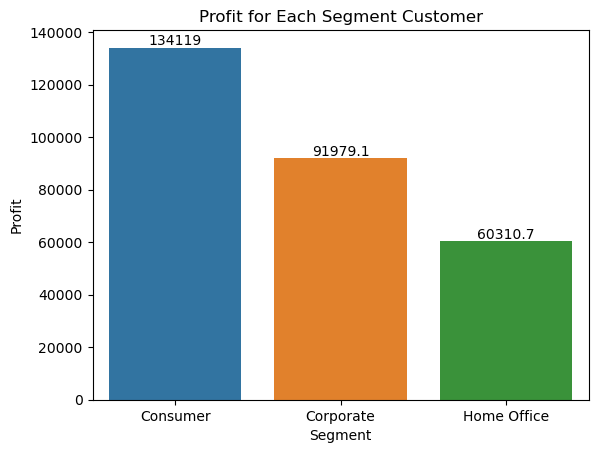

In [595]:
#Create bar graph for profit by segment customer

#df_segment_profit = df.groupby(['Segment', 'Category']).agg({'Profit':'sum'}).reset_index()
#sns.barplot(data=df_segment_profit, x='Segment', y='Profit', orient='v', hue='Category')
# plt.legend(bbox_to_anchor=(1,1))
ax = sns.barplot(data=df_segment_profit, x='Segment', y='Profit', orient='v')
ax.bar_label(ax.containers[0])
ax.set(title="Profit for Each Segment Customer")
plt.show()

Dari bar graphic diatas dapat terlihat bahwa segmen pelanggan _Consumer_ memberikan profit terbesar untuk perusahaan yaitu senilai 134,119 USD, sedangkan home office memberikan profit paling rendah bagi perusahaan sebesar 60,310.7 USD. Informasi ini dapat digunakan untuk bahan pertimbangan kedepannya jika akan menjual sebuah produk baru, dapat mentargetkan segment consumer terlebih dahulu untuk meningkatkan profit paling tinggi. 

## 5.3 Kategori produk mana yang memberikan profit tertinggi untuk perusahaan ?

In [596]:
#Sum profit per Category product

df_product_profit = df.groupby(['Category']).agg({'Profit':'sum'}).reset_index()#.sort_values(by=['Profit'], ascending=False).reset_index()
df_product_profit

,Category,Profit
0,Furniture,18463.33
1,Office Supplies,122490.80
2,Technology,145454.95


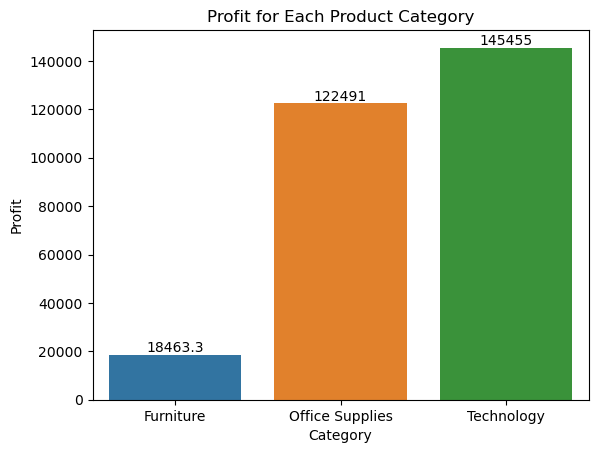

In [597]:
#Create bar graph for profit for by product category

ax = sns.barplot(data=df_product_profit, x='Category', y='Profit', orient='v')
ax.bar_label(ax.containers[0])
ax.set(title="Profit for Each Product Category")
plt.show()

Dari bar graphic diatas dapat terlihat bahwa kategori produk teknologi memberikan profit terbesar untuk perusahaan dengan nilai profit sebesar 145,455 USD, sebaliknya kategori product furniture memberikan profit yang paling sedikit dengan nilai 18,463.3 USD. Informasi dapat digunakan untuk bahan pertimbangan jika akan menjual sebuah produk baru, maka kategori teknologi adalah yang paling menguntungkan. Atau jika ingin meningkatkan profit dapat mengevaluasi kembali mengapa kategori furniture profitnya rendah, apakah produk tersebut tidak laku atau memang profitnya yang rendah.

## 5.4 Apakah terdapat Sub-Kategori produk yang mengurangi profit perusahaan ?

In [57]:
#Sum profit per Sub-Category

df_sub_category = df.groupby(['Category', 'Sub-Category']).agg({'Profit':'sum'}).sort_values(['Category', 'Profit'], ascending = [True, False]) #.reset_index()
df_sub_category

Profit
Category        Sub-Category          
Furniture       Chairs        26602.23
                Furnishings   13059.14
                Bookcases     -3472.56
                Tables       -17725.48
Office Supplies Paper         34053.57
                Binders       30221.76
                Storage       21278.83
                Appliances    18138.01
                Envelopes      6964.18
                Art            6527.79
                Labels         5546.25
                Fasteners       949.52
                Supplies      -1189.10
Technology      Copiers       55617.82
                Phones        44515.73
                Accessories   41936.64
                Machines       3384.76

In [59]:
df_sub_category = df_sub_category.reset_index()

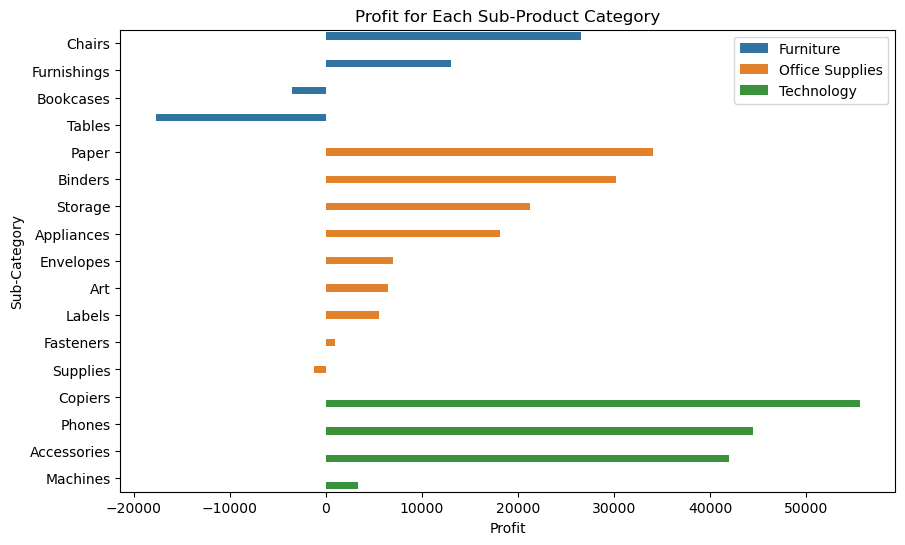

In [60]:
#Create bar plot for profit by sub-product category

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_sub_category, x='Profit', y='Sub-Category', orient='h', hue='Category')
ax.set(title="Profit for Each Sub-Product Category")
plt.legend(loc=1)
plt.show()

In [ ]:
# plt.barh(df_sub_category['Sub-Category'][::-1], df_sub_category['Profit'][::-1])
# plt.title("Profit Percentage")

Dari bar graphic diatas, dapat dilihat bahwa ada beberapa sub-category yang mengalami kerugian. Sub-category pada category Furniture khususnya sub-category tables mengalami kerugian terbesar, hal ini yang menyebabkan mengapa profit untuk category furniture adalah yang paling kecil pada analisa profit per kategori. Hal ini bisa dijadikan bahan evaluasi mengapa bisa terjadi kerugian, apakah karena barang tidak laku sehingga dijual dengan harga murah (diberi diskon yang besar) untuk meminimalisir kerugian. Dan menjadi pertimbangan untuk tahun berikutnya apakah sub-category ini masih perlu dilanjutkan penjualannya atau tidak.

## 5.5 Kategori produk mana yang paling laku terjual ?

In [46]:
#Sum quantity product sold per product category

df_product_category = df.groupby(['Category']).agg(Sold=('Quantity', 'sum'), Profit=('Profit', 'sum')) #.sort_values(by=['Sold'], ascending=False)
df_product_category

,Sold,Profit
Category,,
Furniture,8026,18463.33
Office Supplies,22906,122490.80
Technology,6939,145454.95


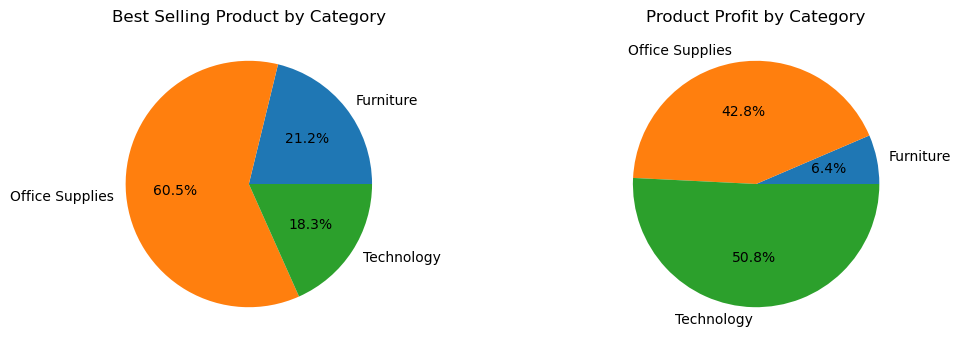

In [58]:
#Create pie chart for best selling product

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
# df_product_category.plot(kind='pie', autopct='%.2f%%',ax=ax1)
# palette_color = sns.color_palette('bright')
# plt.pie(df_product_category['Sold'], labels=df_product_category['Sold'].index, colors=palette_color, autopct='%.2f%%')
# plt.pie(df_product_category['Sold'], labels=df_product_category['Sold'].index, autopct='%.2f%%')
# plt.title('Best Selling Product Category')

ax[0].pie(df_product_category["Sold"], labels=df_product_category["Sold"].index, autopct='%.1f%%')
ax[0].set_title("Best Selling Product by Category")

ax[1].pie(df_product_category["Profit"], labels=df_product_category["Sold"].index, autopct='%.1f%%')
ax[1].set_title("Product Profit by Category")
plt.show()

Dari pie chart diatas dapat terlihat bahwa kategori produk perusahaan yang paling laku adalah office supplies dengan penjualan sebanyak lebih dari 60% dari seluruh penjualan perusahaan. Sedangkan penjualan kategori furniture sebesar 21.21% dan kategori teknologi sebesar 18.48%. Apakah produk yang paling laku juga memberikan keuntungan yang besar bagi perusahaan ?

In [561]:
df_product_category_profit = df.groupby(['Category']).agg(Product_Sold=('Category', 'count'), Profit=('Profit', 'sum')).sort_values(by=['Profit'], ascending=False)
df_product_category_profit

,Product_Sold,Profit
Category,,
Technology,1847,145454.95
Office Supplies,6026,122490.80
Furniture,2120,18463.33


Meskipun penjualan office supplies adalah yang terbanyak, tetapi jika melihat pada analisa sebelumnya pada poin 5.3, profit yang didapat dari penjualan office supplies tidak sebesar kategori teknologi yang jumlah penjualannya hanya sekitar 30% dari offices supplies. Maka perusahaan perlu meningkatkan harga jual atau mengurangi cost pada kategori office supplies untuk meningkatkan profit, karena penjualan produk ini sudah bagus hanya saja profitnya perlu ditingkatkan.

## 5.6 Bagaimana profit perusahaan dalam 4 tahun terakhir di setiap region ?

In [59]:
#Sum profit per region per year

df_yearly_profit = df.copy()
df_yearly_profit['Year'] = df_yearly_profit['Order Date'].dt.year
df_yearly_profit.groupby(['Region', 'Year']).agg({'Profit':'sum'})#.reset_index()

Profit
Region  Year          
Central 2014    539.55
        2015  11716.80
        2016  19899.16
        2017   7550.84
East    2014  17071.67
        2015  21091.01
        2016  20141.60
        2017  33230.56
South   2014  11879.12
        2015   8318.59
        2016  17702.81
        2017   8848.91
West    2014  20065.69
        2015  20492.19
        2016  24051.61
        2017  43808.96

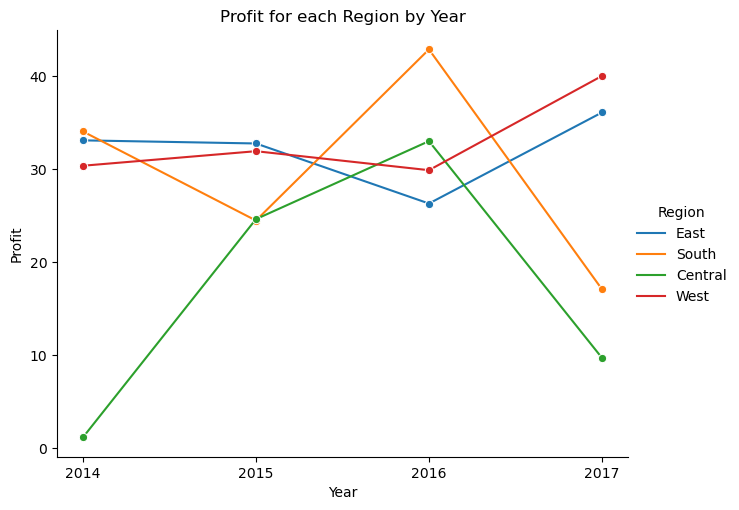

In [60]:
#Create line graph for profit by year

# df_yearly_profit['Year'] = pd.Categorical(df_yearly_profit['Year'], categories=['2014', '2015', '2016', '2017'], ordered=True)
# df_yearly_profit['Year'] = pd.to_datetime(df_yearly_profit['Year'], format='%Y')
df_yearly_profit['Year'] = df_yearly_profit['Year'].astype('str')
sns.relplot(kind='line', data=df_yearly_profit.sort_values(by="Year"), x='Year', y='Profit', hue='Region', aspect=1.3, marker='o', errorbar=None)
plt.title('Profit for each Region by Year')
plt.show()

Berdasarkan line graph diatas, terjadi penurunan profit pada region central dan south pada satu tahun terakhir, sehingga perlu dilakukan evaluasi atau tindakan untuk meningkatkan profit ditahun selanjutnya pada kedua region ini. Sedangkan untuk region west dan east pada satu tahun terakhir mengalami kenaikan profit, ini perlu dipertahankan atau bahkan ditingkatkan kembali.

## 5.7 Apakah jumlah customer memiliki hubungan dengan profit yang didapat pada setiap negara bagian ? (Statistic - Descriptive)

In [61]:
#Count total customer and sum profit for each state

df_cust_profit = df.groupby(['State']).agg({'Customer ID':'count', 'Profit':'sum'}).rename(columns= {'Customer ID':'Total Customer'})
df_cust_profit.head()

,Total Customer,Profit
State,,
Alabama,61,5786.83
Arizona,224,-3427.92
Arkansas,60,4008.69
California,2001,76381.39
Colorado,182,-6527.86


In [62]:
#Check skewness for column customer and profit

print(f"Skewness total customer: {df_cust_profit['Total Customer'].skew()}")
print(f"Skewness total profit: {df_cust_profit['Profit'].skew()}")

Skewness total customer: 3.543887951117252
Skewness total profit: 2.5758509660723456


Skewness dari kedua kolom tersebut adalah positif, dengan nilai skewness lebih besar dari 0.5 yang berarti distribusi data tersebut tidak normal. Maka untuk pengujian korelasi dapat menggunakan teknik spearman atau kendall.

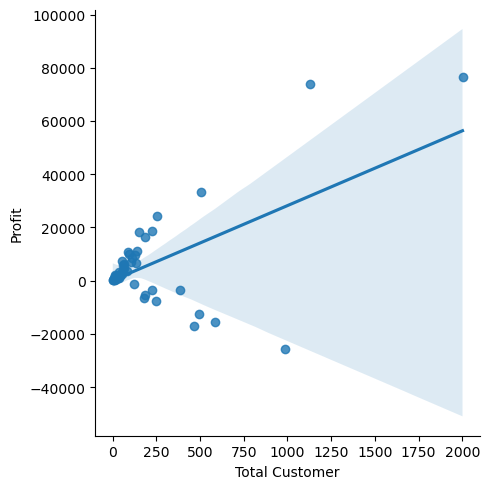

In [63]:
sns.lmplot(data=df_cust_profit, x='Total Customer', y='Profit')

In [64]:
#Calculating correlation using Kendall Tau technique

# corr_rho, pval_s = stats.spearmanr(df_cust_profit['Customer ID'], df_cust_profit['Profit'])
corr_tau, pval_k = stats.kendalltau(df_cust_profit['Total Customer'], df_cust_profit['Profit'])

# print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

tau-correlation: 0.26, p-value: 0.009225646856918127


Perhitungan korelasi menggunakan metode kendall diatas menghasilkan nilai korelasi yaitu 0.26. Nilai korelasi ini positif tetapi masih dibawah 1 dan mendekati 0 yang berarti jumlah customer tidak memiliki korelasi terhadap profit perusahaan. Artinya meningkatkan jumlah customer belum tentu meningkatkan jumlah profit. Jika berdasarkan analisa sebelumnya meningkatkan penjualan produk yang tepat lebih berdampak kepada profit perusahaan, tidak perlu untuk meningkatkan jumlah customer.

## 5.8 Apakah jumlah diskon yang diberikan mempengaruhi profit perusahaan ? (Statistic Inferential)

Untuk mencari tahu apakah diskon mempengaruhi profit perusahaan maka akan dilakukan test menggunakan metode Chi-Squared dengan hipotesis sebagai berikut :

$H_0$ : Jumlah diskon tidak mempengaruhi profit perusahaan

$H_1$ : Jumlah diskon mempengaruhi profit perusahaan

Sebelum tes dilakukan, data discount dan profit perlu diubah menjadi kategorikal terlebih dahulu.

In [65]:
#Change numerical column into categorical column

df_disc_profit = df.copy()
discount_conditions = [(df_disc_profit['Discount'] <= 0.35), (df_disc_profit['Discount'] > 0.35) & (df_disc_profit['Discount'] <= 0.65), (df_disc_profit['Discount'] > 0.65)]
discount_category = ['Low', 'Medium', 'High']
df_disc_profit['Discount_Category'] = np.select(discount_conditions, discount_category)
df_disc_profit['Profit_Loss'] = np.where(df['Profit'] > 0, 'Profit', 'Loss')
df_disc_profit['Discount_Category'] = pd.Categorical(df_disc_profit['Discount_Category'], categories=['Low', 'Medium', 'High'])
df_disc_profit['Profit_Loss'] = pd.Categorical(df_disc_profit['Profit_Loss'], categories=['Profit', 'Loss'])

Membagi diskon menjadi 3 kategori :
- Diskon 0~35% = Low
- Diskon 36%~65% = Medium
- Diskon 66%~100% = High

Membagi profit menjadi 2 kategori :
- Jika profit lebih besar sama dengan 0 maka dikategorikan 'Profit'
- Jika profit kurang dari 0 maka dikategorikan 'Loss'

In [66]:
cross = pd.crosstab(df_disc_profit['Discount_Category'], df_disc_profit['Profit_Loss'])
cross

Profit_Loss,Profit,Loss
Discount_Category,,
Low,8032,822
Medium,26,395
High,0,718


In [67]:
#Calculate pvalue using chi-square test

pval = stats.chi2_contingency(cross).pvalue
print("P-value:", pval)

P-value: 0.0


Dari hasil pengujian tersebut nilai P-value yang didapatkan adalah 0.0 dimana nilai ini lebih kecil dari critical value 0.05, artinya $H_0$ ditolak. Karena $H_0$ ditolak maka kesimpulannya adalah **jumlah diskon memang mempengaruhi profit perusahaan**, semakin besar jumlah diskon yang diberikan semakin kecil profit perusahaan, bahkan sampai merugi.

# 6. Conclusion

Kesimpulannya, untuk meningkatkan profit perusahaan dapat dilakukan dengan cara meningkatkan penjualan pada negara bagian yang profitnya tinggi, atau dengan cara meningkatkan profit penjualan pada negara bagian yang profitnya rendah. Meningkatkan profit penjualan ini dapat dilakukan dengan mentargetkan pelanggan dan produk mana yang akan ditingkatkan penjualannya, dengan meningkatkan penjualan pada pelanggan dan produk yang tepat yaitu segmen consumer dan kategori teknologi dapat menghasilkan profit yang maksimal. Selanjutnya, mengurangi penjualan pada kategori atau sub-kategori produk yang mengalami kerugian (dalam kasus ini adalah sub-kategori furniture) juga dapat meningkatkan profit perusahaan secara keseluruhan, jika memang produk tersebut merugi maka patut dipertimbangkan apakah perlu dijual kembali ditahun berikutnya atau tidak.

Selain itu jumlah pelanggan tidak memiliki hubungan dengan profit yang didapat perusahaan maka perusahaan tidak wajib mengeluarkan biaya untuk menambah pelanggan. Faktor yang paling mempengaruhi profit perusahaan dalam 4 tahun terakhir adalah diskon yang diberikan kepada pelanggan, diskon yang terlalu besar menyebabkan perusahaan mengalami kerugian pada beberapa negara bagian, sehingga jumlah diskon ini perlu dievaluasi kembali agar tidak sampai merugikan perusahaan.